In [2]:
from pandas import read_csv, DataFrame, Grouper, Series
from sklearn.metrics import mean_squared_error
from math import sqrt, log, exp
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
import warnings
from statsmodels.graphics.gofplots import qqplot
import numpy

series_org = read_csv('champagne.csv', header=0, index_col=0,
             parse_dates=True).squeeze("columns")
split_point = len(series_org) - 12
dataset, validation = series_org[0:split_point], series_org[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset_champagne.csv', header=False)
validation.to_csv('validation_champagne.csv', header=False)

Dataset 93, Validation 12


In [3]:
# prepare data
# load data
series = read_csv('dataset_champagne.csv',header=None, index_col=0,
         parse_dates=True).squeeze("columns")
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# print(len(train))
# print(len(test))
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
 # predict
 yhat = history[-1]
 predictions.append(yhat)
 # observation
 obs = test[i]
 history.append(obs)
 print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=5428.000, Expected=8314
>Predicted=8314.000, Expected=10651
>Predicted=10651.000, Expected=3633
>Predicted=3633.000, Expected=4292
>Predicted=4292.000, Expected=4154
>Predicted=4154.000, Expected=4121
>Predicted=4121.000, Expected=4647
>Predicted=4647.000, Expected=4753
>Predicted=4753.000, Expected=3965
>Predicted=3965.000, Expected=1723
>Predicted=1723.000, Expected=5048
>Predicted=5048.000, Expected=6922
>Predicted=6922.000, Expected=9858
>Predicted=9858.000, Expected=11331
>Predicted=11331.000, Expected=4016
>Predicted=4016.000, Expected=3957
>Predicted=3957.000, Expected=4510
>Predicted=4510.000, Expected=4276
>Predicted=4276.000, Expected=4968
>Predicted=4968.000, Expected=4677
>Predicted=4677.000, Expected=3523
>Predicted=3523.000, Expected=1821
>Predicted=1821.000, Expected=5222
>Predicted=5222.000, Expected=6872
>Predicted=6872.000, Expected=10803
>Predicted=10803.000, Expected=13916
>Predicted=13916.000, Expected=2639
>Predicted=2639.000, Expected=2899
>Predicted=2

In [3]:
print(series.describe())

count       93.000000
mean      4641.118280
std       2486.403841
min       1573.000000
25%       3036.000000
50%       4016.000000
75%       5048.000000
max      13916.000000
Name: 1, dtype: float64


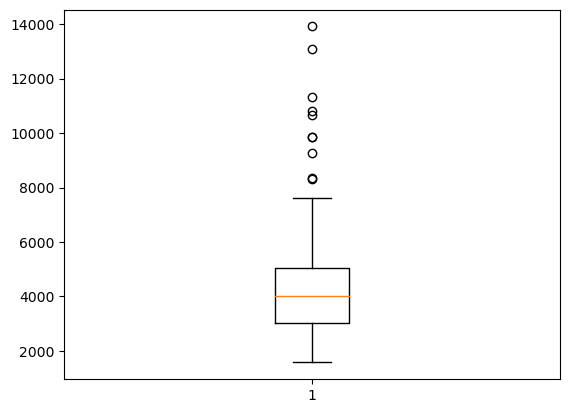

In [4]:
pyplot.boxplot(X)
pyplot.show()

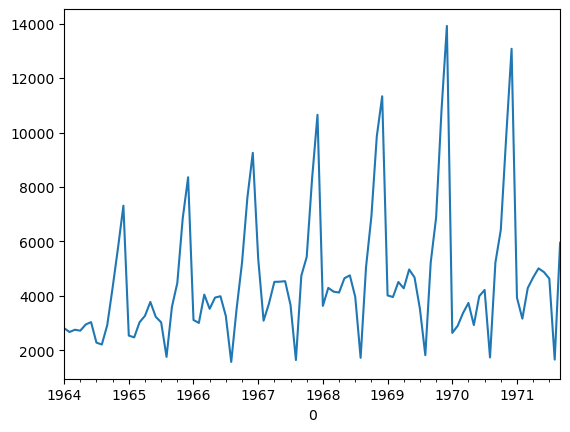

In [5]:
series.plot()
pyplot.show()

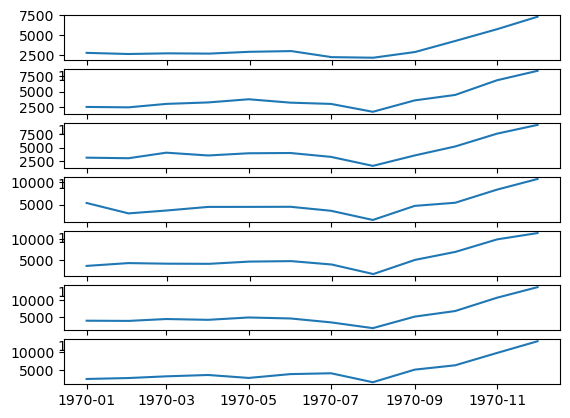

In [6]:
groups = series['1964':'1970'].groupby(Grouper(freq='A'))
#print(len(groups))
years = DataFrame()
pyplot.figure()
i = 1
n_groups = len(groups)
for name, group in groups:
 #print(name, group)
 pyplot.subplot((n_groups*100) + 10 + i)
 i += 1
 pyplot.plot(group)
pyplot.show()

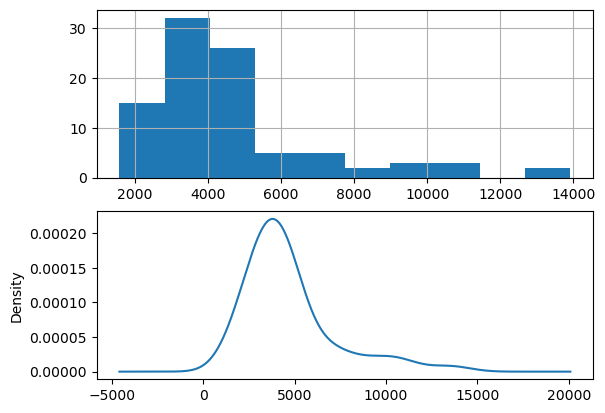

In [7]:
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()

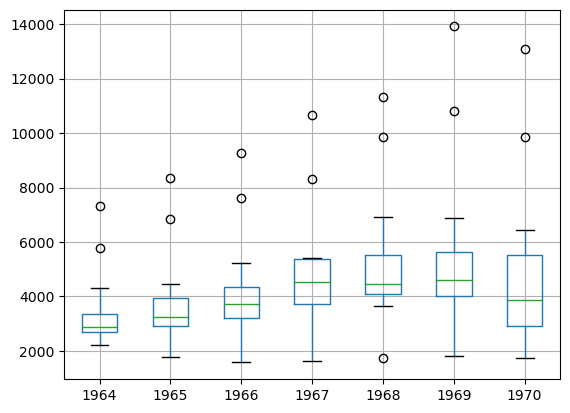

In [8]:
groups = series['1964':'1970'].groupby(Grouper(freq='A'))
#print(groups)
years = DataFrame()
for name, group in groups:
        #print(name)
        # print(group)
        # print(group.values)
        years[name.year] = group.values
#print(decades)
years.boxplot()
pyplot.show()

In [9]:
print(years.describe())

              1964         1965         1966          1967          1968  \
count    12.000000    12.000000    12.000000     12.000000     12.000000   
mean   3478.166667  3864.166667  4337.666667   5016.000000   5370.583333   
std    1555.294759  1900.883758  2119.889119   2380.616001   2723.367082   
min    2212.000000  1759.000000  1573.000000   1643.000000   1723.000000   
25%    2708.750000  2906.250000  3223.250000   3704.250000   4082.000000   
50%    2868.500000  3248.000000  3732.500000   4529.500000   4469.500000   
75%    3352.250000  3950.500000  4338.000000   5388.250000   5516.500000   
max    7312.000000  8357.000000  9254.000000  10651.000000  11331.000000   

               1969          1970  
count     12.000000     12.000000  
mean    5713.416667   5006.583333  
std     3382.162795   3324.223996  
min     1821.000000   1738.000000  
25%     4001.250000   2920.000000  
50%     4593.500000   3863.000000  
75%     5634.500000   5521.750000  
max    13916.000000  13076.

ADF Statistic: -7.134898
p-value: 0.000000
Critical Values:
	1%: -3.515
	5%: -2.898
	10%: -2.586


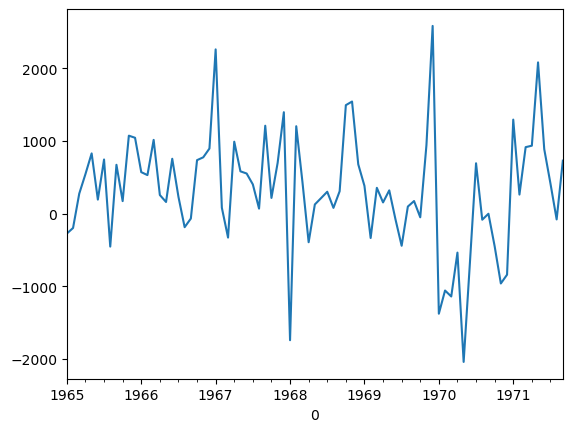

In [5]:
# statistical test for the stationarity of the time series

# create a differenced series. did this way since it has seasonality
def difference(dataset, interval=1):
 diff = list()
 #print('interval: %d' % interval) 
 for i in range(interval, len(dataset)):
  value = dataset[i] - dataset[i - interval]
  diff.append(value)
 return Series(diff)

# difference data
months_in_year = 12
stationary = difference(X, months_in_year)
#print(stationary) 
# print(series.index)
stationary.index = series.index[months_in_year:]
# print(series.index[months_in_year:])
#print(stationary.index) 
#print(stationary) 
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
# save
stationary.to_csv('stationary_champagne.csv', header=False)
# plot
stationary.plot()
pyplot.show()

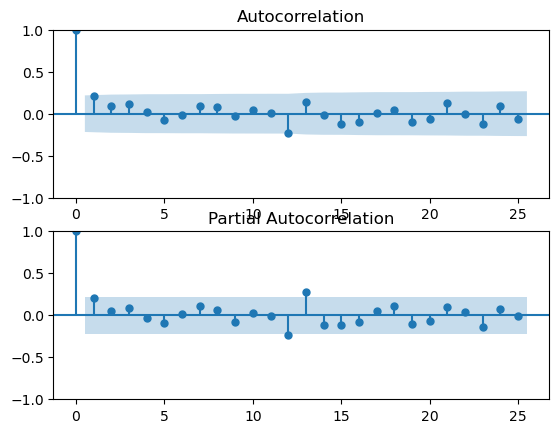

In [11]:
series1 = read_csv('stationary_champagne.csv', header=None, index_col=0, 
          parse_dates=True).squeeze("columns")
pyplot.figure()
pyplot.subplot(211)
plot_acf(series1, lags=25, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(series1, lags=25, ax=pyplot.gca(), method="ywm")
pyplot.show()

In [6]:
# evaluate manually configured ARIMA model

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# walk-forward validation
history = [x for x in train]
#print(history[-12])
predictions = list()
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(1,1,1))
	model_fit = model.fit()
	yhat = model_fit.forecast()
	#print(yhat)
	yhat = inverse_difference(history, yhat, months_in_year)
	#print(yhat)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=8076.989, Expected=8314.000
>Predicted=9747.153, Expected=10651.000
>Predicted=5994.360, Expected=3633.000
>Predicted=3820.287, Expected=4292.000
>Predicted=4041.968, Expected=4154.000
>Predicted=4990.405, Expected=4121.000
>Predicted=5129.641, Expected=4647.000
>Predicted=5031.196, Expected=4753.000
>Predicted=4133.285, Expected=3965.000
>Predicted=2095.321, Expected=1723.000
>Predicted=5216.271, Expected=5048.000
>Predicted=5866.317, Expected=6922.000
>Predicted=8591.061, Expected=9858.000
>Predicted=11028.649, Expected=11331.000
>Predicted=4090.352, Expected=4016.000
>Predicted=4767.109, Expected=3957.000
>Predicted=4656.326, Expected=4510.000
>Predicted=4577.708, Expected=4276.000
>Predicted=5108.656, Expected=4968.000
>Predicted=5202.831, Expected=4677.000
>Predicted=4423.982, Expected=3523.000
>Predicted=2162.388, Expected=1821.000
>Predicted=5463.233, Expected=5222.000
>Predicted=7331.345, Expected=6872.000
>Predicted=10258.650, Expected=10803.000
>Predicted=11732.476

In [14]:
# grid search ARIMA parameters for time series

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):

	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		# difference data
		months_in_year = 12
		diff = difference(history, months_in_year)
		model = ARIMA(diff, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()
		yhat = inverse_difference(history, yhat, months_in_year)
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# load dataset
series = read_csv('dataset_champagne.csv', header=None, index_col=0, parse_dates=True).squeeze("columns")
# evaluate parameters
p_values = range(0, 7)
d_values = range(0, 3)
q_values = range(0, 7)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=947.677
ARIMA(0, 0, 1) RMSE=948.007
ARIMA(0, 0, 2) RMSE=973.907
ARIMA(0, 0, 3) RMSE=987.019
ARIMA(0, 0, 4) RMSE=1009.241
ARIMA(0, 0, 5) RMSE=1037.359
ARIMA(0, 0, 6) RMSE=1062.501
ARIMA(0, 1, 0) RMSE=1145.923
ARIMA(0, 1, 1) RMSE=959.120
ARIMA(0, 1, 2) RMSE=958.608
ARIMA(0, 1, 3) RMSE=976.966
ARIMA(0, 1, 4) RMSE=982.294
ARIMA(0, 1, 5) RMSE=1013.157
ARIMA(0, 1, 6) RMSE=1063.163
ARIMA(0, 2, 0) RMSE=1930.801
ARIMA(0, 2, 1) RMSE=1157.260
ARIMA(0, 2, 2) RMSE=957.866
ARIMA(0, 2, 3) RMSE=983.770
ARIMA(0, 2, 4) RMSE=977.566
ARIMA(0, 2, 5) RMSE=1069.166
ARIMA(0, 2, 6) RMSE=1054.975
ARIMA(1, 0, 0) RMSE=945.107
ARIMA(1, 0, 1) RMSE=979.264
ARIMA(1, 0, 2) RMSE=975.300
ARIMA(1, 0, 3) RMSE=997.216
ARIMA(1, 0, 4) RMSE=1033.150
ARIMA(1, 0, 5) RMSE=1073.501
ARIMA(1, 0, 6) RMSE=1081.321
ARIMA(1, 1, 0) RMSE=1071.385
ARIMA(1, 1, 1) RMSE=961.548
ARIMA(1, 1, 2) RMSE=962.161
ARIMA(1, 1, 3) RMSE=962.077
ARIMA(1, 1, 4) RMSE=984.440
ARIMA(1, 1, 5) RMSE=1004.278
ARIMA(1, 1, 6) RMSE=1045.548
ARIM

/home/mahmud/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mahmud/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mahmud/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mahmud/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mahmud/anaconda3/lib/python

                 0
count    47.000000
mean   -126.468418
std     929.928332
min   -2281.128359
25%    -542.978638
50%    -292.844775
75%     425.352499
max    2002.011920


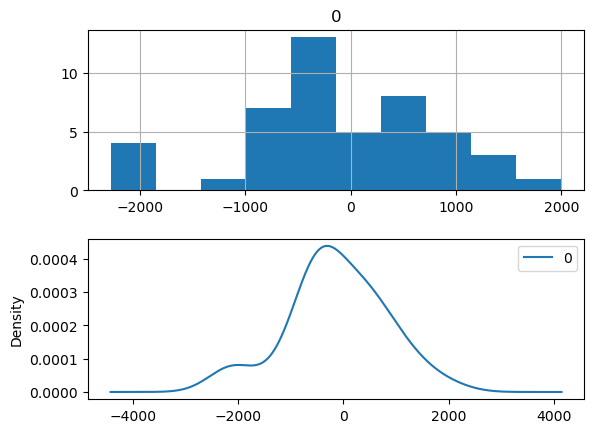

In [13]:
# summarize ARIMA forecast residuals
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
 
# create a differenced series
def difference(dataset, interval=1):
 diff = list()
 for i in range(interval, len(dataset)):
   value = dataset[i] - dataset[i - interval]
   diff.append(value)
 return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
 return yhat + history[-interval]
 
# load data
series = read_csv('dataset_champagne.csv', header=None, index_col=0, parse_dates=True).squeeze("columns")
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
 # difference data
 months_in_year = 12
 diff = difference(history, months_in_year)
 # predict
 model = ARIMA(diff, order=(5,1,4))
 model_fit = model.fit()
 yhat = model_fit.forecast()[0]
 yhat = inverse_difference(history, yhat, months_in_year)
 predictions.append(yhat)
 # observation
 obs = test[i]
 history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

/home/mahmud/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mahmud/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mahmud/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mahmud/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mahmud/anaconda3/lib/python

RMSE: 919.982
                  0
count  4.700000e+01
mean   3.961902e-07
std    9.299283e+02
min   -2.154660e+03
25%   -4.165102e+02
50%   -1.663764e+02
75%    5.518209e+02
max    2.128480e+03


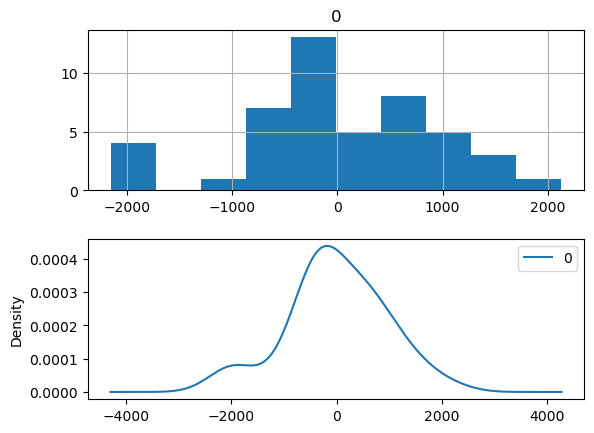

In [17]:
# plots of residual errors of bias corrected forecasts
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
 
# create a differenced series
def difference(dataset, interval=1):
 diff = list()
 for i in range(interval, len(dataset)):
   value = dataset[i] - dataset[i - interval]
   diff.append(value)
 return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
 return yhat + history[-interval]
 
# load data
series = read_csv('dataset_champagne.csv', header=None, index_col=0, parse_dates=True).squeeze("columns")
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = -126.468418
for i in range(len(test)):
 # difference data
 months_in_year = 12
 diff = difference(history, months_in_year)
 # predict
 model = ARIMA(diff, order=(5,1,4))
 model_fit = model.fit()
 yhat = model_fit.forecast()[0]
 yhat = bias + inverse_difference(history, yhat, months_in_year)
 predictions.append(yhat)
 # observation
 obs = test[i]
 history.append(obs)
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

/home/mahmud/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mahmud/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mahmud/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mahmud/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mahmud/anaconda3/lib/python

                 0
count    47.000000
mean   -126.468418
std     929.928332
min   -2281.128359
25%    -542.978638
50%    -292.844775
75%     425.352499
max    2002.011920


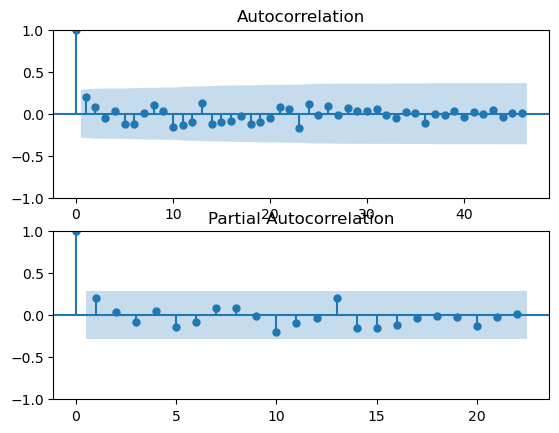

In [11]:
# ACF and PACF plots of residual errors of bias corrected forecasts
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
 
# create a differenced series
def difference(dataset, interval=1):
 diff = list()
 for i in range(interval, len(dataset)):
   value = dataset[i] - dataset[i - interval]
   diff.append(value)
 return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
 return yhat + history[-interval]
 
# load data
series = read_csv('dataset_champagne.csv', header=None, index_col=0, parse_dates=True).squeeze("columns")
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
 # difference data
 months_in_year = 12
 diff = difference(history, months_in_year)
 # predict
 model = ARIMA(diff, order=(5,1,4))
 model_fit = model.fit()
 yhat = model_fit.forecast()[0]
 yhat = inverse_difference(history, yhat, months_in_year)
 predictions.append(yhat)
 # observation
 obs = test[i]
 history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca(), lags =46)
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca(), lags =22, method="ywm")
pyplot.show()

In [13]:
# save finalized model
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
 diff = list()
 for i in range(interval, len(dataset)):
   value = dataset[i] - dataset[i - interval]
   diff.append(value)
 return diff
 
# load data
series = read_csv('dataset_champagne.csv', header=None, index_col=0, parse_dates=True).squeeze("columns")
X = series.values
X = X.astype('float32')
# difference data
months_in_year = 12
diff = difference(X, months_in_year)
# fit model
model = ARIMA(diff, order=(5,1,4))
model_fit = model.fit()
# bias constant, could be calculated from in-sample mean residual
bias = -126.468418
# save model
model_fit.save('model_champagne.pkl')
numpy.save('model_bias_champagne.npy', [bias])

/home/mahmud/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mahmud/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/mahmud/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
# load finalized model and make a prediction
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMAResults
import numpy
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
 return yhat + history[-interval]
 
series = read_csv('dataset_champagne.csv', header=None, index_col=0, parse_dates=True).squeeze("columns")
months_in_year = 12
model_fit = ARIMAResults.load('model_champagne.pkl')
bias = numpy.load('model_bias_champagne.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(series.values, yhat, months_in_year)
print('Predicted: %.3f' % yhat)

Predicted: 6666.784


>Predicted=6666.784, Expected=6981.000
>Predicted=10064.254, Expected=9851.000
>Predicted=13200.943, Expected=12670.000
>Predicted=3986.316, Expected=4348.000
>Predicted=3391.793, Expected=3564.000
>Predicted=4479.629, Expected=4577.000
>Predicted=4854.784, Expected=4788.000
>Predicted=5154.260, Expected=4618.000
>Predicted=4916.692, Expected=5312.000
>Predicted=4861.481, Expected=4298.000
>Predicted=1696.165, Expected=1413.000
>Predicted=6034.471, Expected=5877.000
RMSE: 349.625


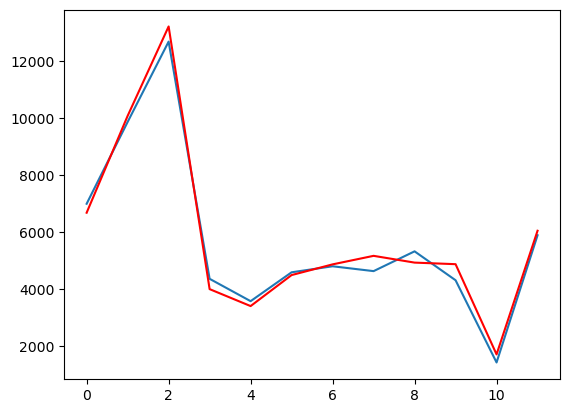

In [18]:
# load and evaluate the finalized model on the validation dataset
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
 diff = list()
 for i in range(interval, len(dataset)):
   value = dataset[i] - dataset[i - interval]
   diff.append(value)
 return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
 return yhat + history[-interval]
 
# load and prepare datasets
dataset = read_csv('dataset_champagne.csv', header=None, index_col=0, parse_dates=True).squeeze("columns")
X = dataset.values.astype('float32')
history = [x for x in X]
months_in_year = 12
validation = read_csv('validation_champagne.csv', header=None, index_col=0, parse_dates=True).squeeze("columns") 
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model_champagne.pkl')
bias = numpy.load('model_bias_champagne.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(history, yhat, months_in_year)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
 # difference data
 months_in_year = 12
 diff = difference(history, months_in_year)
 # predict
 model = ARIMA(diff, order=(0,0,1))
 model_fit = model.fit()
 yhat = model_fit.forecast()[0]
 yhat = bias + inverse_difference(history, yhat, months_in_year)
 predictions.append(yhat)
 # observation
 obs = y[i]
 history.append(obs)
 print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(y, predictions))
print('RMSE: %.3f' % rmse)
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.show()